<a href="https://colab.research.google.com/github/azizadila/H8_062/blob/main/PYTN_Assign_3_batch_062_Aziza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np

In [35]:
#(1) EXTRACT DATA FROM GDRIVE

from google.colab import drive
drive.mount('/content/drive')

bank = pd.read_csv("/content/drive/MyDrive/Assignment 1/bank.csv")
bank = bank.dropna()
bank = bank.drop(bank.loc[bank['pdays'] <= 0].index)
bank = bank.drop('balance',1)
print(bank.shape)

bank.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(816, 16)


,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,33,services,married,secondary,no,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,yes,no,cellular,16,apr,185,1,330,1,failure,no
5,35,management,single,tertiary,no,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,yes,no,cellular,14,may,341,1,330,2,other,no
9,43,services,married,primary,no,yes,yes,cellular,17,apr,313,1,147,2,failure,no


Sebelum memilih algoritm, dilakukan sampling Visualization antara beberapa feature terhadap target. Tujuannya adalah untuk mengetahui kolerasi antara feature dan target


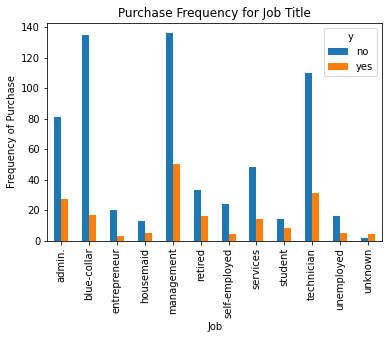

Job memiliki keterkaitan/kolerasi dengan target


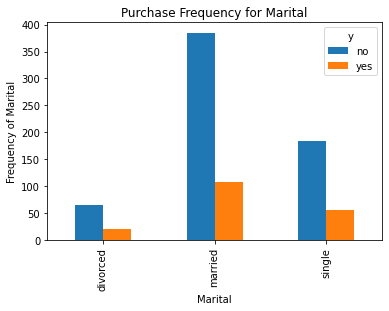

Marital memiliki keterkaitan/kolerasi dengan target


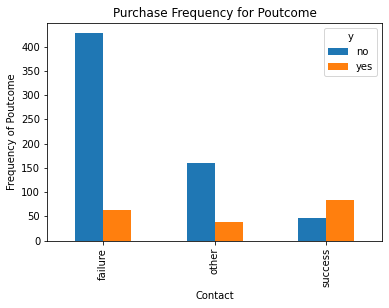

Poutcome memiliki keterkaitan/kolerasi dengan target


In [36]:
#(1) VISUALIZATION

print("Sebelum memilih algoritm, dilakukan sampling Visualization antara beberapa feature terhadap target. Tujuannya adalah untuk mengetahui kolerasi antara feature dan target")

%matplotlib inline
import matplotlib.pyplot as plt

pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.show()
print("Job memiliki keterkaitan/kolerasi dengan target")

pd.crosstab(bank.marital,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Marital')
plt.xlabel('Marital')
plt.ylabel('Frequency of Marital')
plt.show()
print("Marital memiliki keterkaitan/kolerasi dengan target")

pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Contact')
plt.ylabel('Frequency of Poutcome')
plt.show()
print("Poutcome memiliki keterkaitan/kolerasi dengan target")

In [37]:
X=bank.drop('y',1)
y=bank.y

X=pd.get_dummies(X)
bank=pd.get_dummies(bank)

X.head()

,age,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
1,33,11,220,1,339,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,35,16,185,1,330,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,35,23,141,2,176,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
6,36,14,341,1,330,2,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
9,43,17,313,1,147,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [38]:
from sklearn.model_selection import train_test_split
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)

In [39]:
#(1) RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,class_weight=None,criterion='gini',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=None,oob_score=False,random_state=None,verbose=0,warm_start=False)
pred_cv=rf.predict(x_cv)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print(accuracy_score(y_cv,pred_cv))
matrix=confusion_matrix(y_cv,pred_cv)
print(matrix)

0.8353658536585366
[[122   6]
 [ 21  15]]


Dari bar chart diatas, maka diputuskan untuk menggunakan algoritm → Random Forest, karena melihat keterkaitan dari setiap feature terhadap target sehingga agar hasilnya lebih akurat, dipilihlah algoritm berikut

In [40]:
#(2) EXTRACT DATA FROM GDRIVE

bank_full = pd.read_csv("/content/drive/MyDrive/Assignment 1/bank-full.csv")
bank_full = bank_full.dropna()
bank_full = bank_full.drop(bank_full.loc[bank_full['pdays'] <= 0].index)
bank_full = bank_full.drop('balance',1)
print(bank_full.shape)

bank_full.head()

(8257, 16)


,age,job,marital,education,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
24060,33,admin.,married,tertiary,no,no,no,telephone,21,oct,39,1,151,3,failure,no
24062,42,admin.,single,secondary,no,yes,yes,telephone,21,oct,519,1,166,1,other,yes
24064,33,services,married,secondary,no,yes,no,telephone,21,oct,144,1,91,4,failure,yes
24072,36,management,married,tertiary,no,yes,no,telephone,22,oct,73,1,86,4,other,no
24077,36,management,married,tertiary,no,yes,no,telephone,23,oct,140,1,143,3,failure,yes


In [41]:
X=bank_full.drop('y',1)
y=bank_full.y

X=pd.get_dummies(X)
bank_full=pd.get_dummies(bank_full)

X.head()

,age,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
24060,33,21,39,1,151,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
24062,42,21,519,1,166,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
24064,33,21,144,1,91,4,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
24072,36,22,73,1,86,4,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
24077,36,23,140,1,143,3,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [42]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)

In [43]:
#(2) RANDOM FOREST

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True,ccp_alpha=0.0,class_weight=None,criterion='gini',max_depth=None,max_features='auto',max_leaf_nodes=None,max_samples=None,min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2,min_weight_fraction_leaf=0.0,n_estimators=100,n_jobs=None,oob_score=False,random_state=None,verbose=0,warm_start=False)
pred_cv2=rf.predict(x_cv)
print(accuracy_score(y_cv,pred_cv2))
matrix2=confusion_matrix(y_cv,pred_cv2)
print(matrix2)

0.8559322033898306
[[1204   80]
 [ 158  210]]


Karena data set berikut memiliki feature-feature yang berhubungan dengan target atau saling memiliki kolerasi dengan target, maka diputuskan untuk menggunakan Random Forest seperti data set sebelumnya agar hasil lebih akurat

In [44]:
#(3) EXTRACT DATA FROM GDRIVE

bank_add = pd.read_csv("/content/drive/MyDrive/Assignment 1/bank-additional.csv")
bank_add = bank_add.dropna()
bank_add = bank_add.drop(bank_add.loc[bank_add['pdays'] <= 0].index)
print(bank_add.shape)

bank_add.head()

(4117, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,487,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,346,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,227,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,17,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,58,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


Sebelum memilih algoritm, dilakukan sampling Visualization antara beberapa feature terhadap target. Tujuannya adalah untuk mengetahui kolerasi antara feature dan target


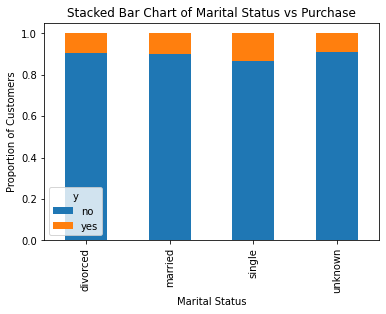

Marital Status tidak terlalu berpengaruh terhadap dengan target


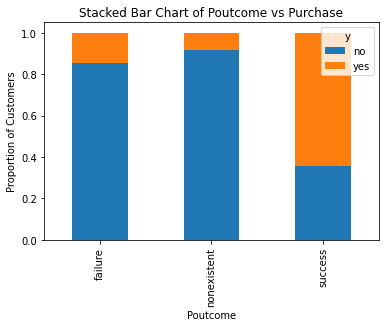

Poutcome memiliki keterkaitan/kolerasi dengan target


In [45]:
#(3) VISUALIZATION

print("Sebelum memilih algoritm, dilakukan sampling Visualization antara beberapa feature terhadap target. Tujuannya adalah untuk mengetahui kolerasi antara feature dan target")

table=pd.crosstab(bank_add.marital,bank_add.y)
table.div(table.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.show()
print("Marital Status tidak terlalu berpengaruh terhadap dengan target")

table2=pd.crosstab(bank_add.poutcome,bank_add.y)
table2.div(table2.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.title('Stacked Bar Chart of Poutcome vs Purchase')
plt.xlabel('Poutcome')
plt.ylabel('Proportion of Customers')
plt.show()
print("Poutcome memiliki keterkaitan/kolerasi dengan target")

In [46]:
X=bank_add.drop('y',1)
y=bank_add.y

X=pd.get_dummies(X)
bank_add=pd.get_dummies(bank_add)

In [47]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)

In [48]:
#(3) LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None,max_iter=100,multi_class='auto',n_jobs=None,penalty='l2',random_state=None,solver='lbfgs',tol=0.0001,verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Karena data set berikut memiliki feature yang tidak terlalu berpengaruh terhadap target, dan data set memiliki banyak fitur maka dipilih algoritm Logistic Regression karena algorithm ini bisa digunakan untuk large datasets

In [49]:
pred_cv3=model.predict(x_cv)

print(accuracy_score(y_cv,pred_cv3))
matrix3=confusion_matrix(y_cv,pred_cv3)
print(matrix3)

0.9247572815533981
[[723  19]
 [ 43  39]]


In [50]:
#(4) EXTRACT DATA FROM GDRIVE

bank_add_full = pd.read_csv("/content/drive/MyDrive/Assignment 1/bank-additional-full.csv")
bank_add_full = bank_add_full.dropna()
bank_add_full = bank_add_full.drop(bank_add_full.loc[bank_add_full['pdays'] <= 0].index)
print(bank_add_full.shape)

bank_add_full.head()

(41173, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [51]:
X=bank_add_full.drop('y',1)
y=bank_add_full.y

X=pd.get_dummies(X)
bank_add_full=pd.get_dummies(bank_add_full)

In [52]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y,test_size=0.2)

In [53]:
#(4) LOGISTIC REGRESSION

from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0,class_weight=None,dual=False,fit_intercept=True,intercept_scaling=1,l1_ratio=None,max_iter=100,multi_class='auto',n_jobs=None,penalty='l2',random_state=None,solver='lbfgs',tol=0.0001,verbose=0)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

Karena data set berikut memiliki feature yang tidak terlalu berpengaruh terhadap target, dan data set memiliki banyak fitur maka dipilih algoritm Logistic Regression karena algorithm ini bisa digunakan untuk large datasets

In [54]:
pred_cv4=model.predict(x_cv)

print(accuracy_score(y_cv,pred_cv4))
matrix4=confusion_matrix(y_cv,pred_cv4)
print(matrix4)

0.9111111111111111
[[7111  208]
 [ 524  392]]
